In [15]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

df = pd.read_csv('madfhantr.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [16]:
df.shape

(614, 13)

In [18]:
cols = ["Gender","Married",	"Education"	,"Self_Employed",	"Property_Area",	"Loan_Status"]
label_encoder = LabelEncoder()
for column in cols:
  df[column] = label_encoder.fit_transform(df[column])

In [20]:
df.drop(columns=["Loan_ID"])

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [25]:
print(df.isnull().sum())
df["Dependents"] = df["Dependents"].replace("3+", "3")

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [29]:
df = df.drop(columns=["Loan_ID"])


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [31]:
valcol = ["LoanAmount",	"Loan_Amount_Term"]
for cols in valcol:
  df[cols] = df[cols].fillna(df[cols].median())

In [35]:
print(df.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [34]:
catcol = ["Dependents", "Credit_History"]
for cols in catcol:
  df[cols] = df[cols].fillna(df[cols].mode()[0])

In [38]:
for cols in df.columns:
  print(cols, (df[cols] == 0).sum())

Gender 112
Married 213
Dependents 0
Education 480
Self_Employed 500
ApplicantIncome 0
CoapplicantIncome 0
LoanAmount 0
Loan_Amount_Term 0
Credit_History 89
Property_Area 179
Loan_Status 192


In [37]:
df["CoapplicantIncome"] = df["CoapplicantIncome"].replace(0, np.NaN).fillna(df["CoapplicantIncome"].median())

In [39]:
X = df.drop(columns=["Loan_Status"])
y = df["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [40]:
model = DecisionTreeClassifier(max_depth=3, criterion='gini')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

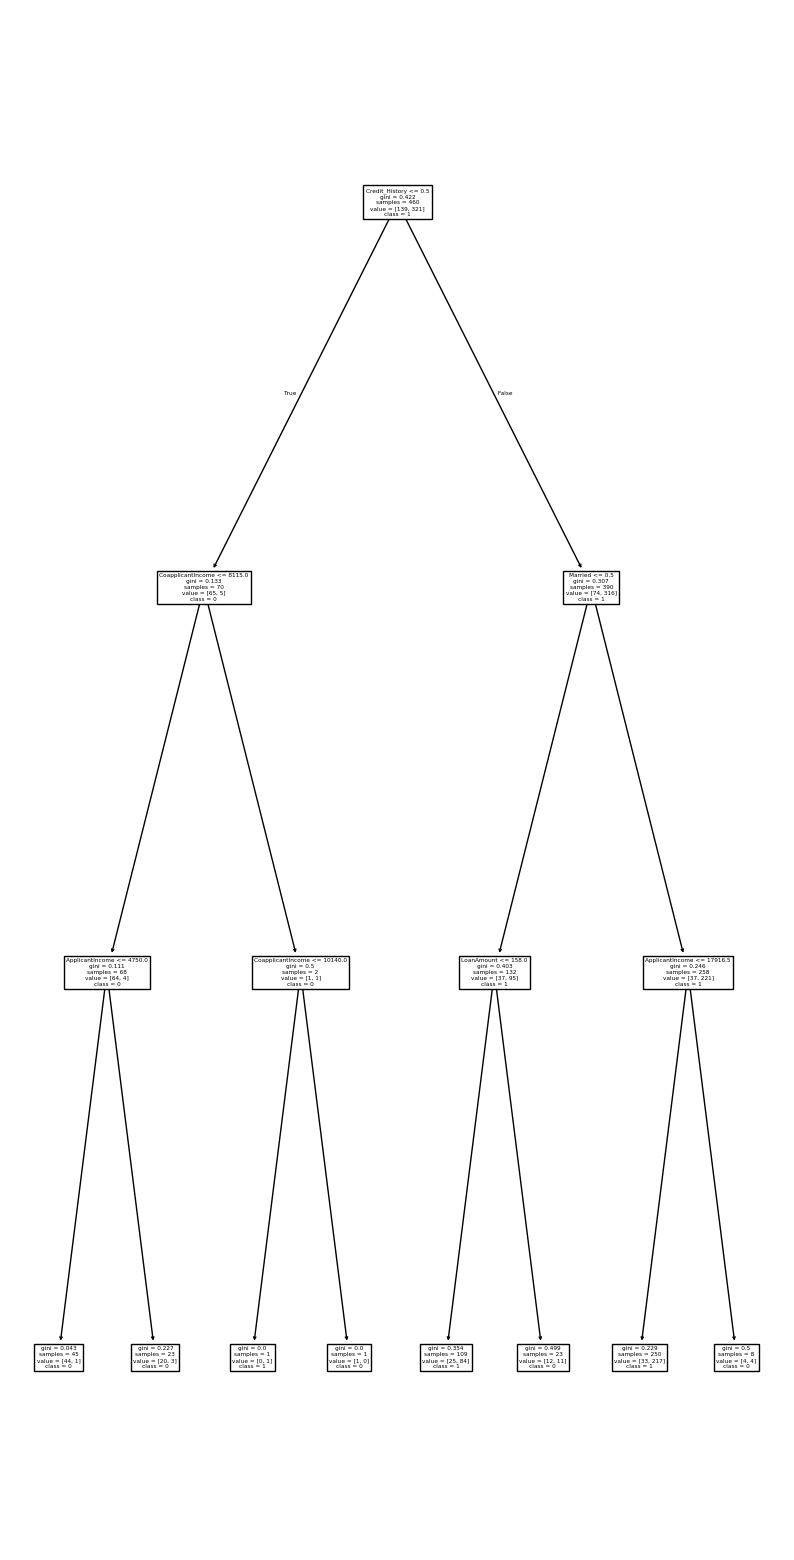

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,20))
plot_tree(model, feature_names=X.columns, class_names=['0', '1'])
plt.show()

In [43]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.7012987012987013


In [46]:
print(f"Model Importance: {model.feature_importances_}")
print(f"Model Importance: {model.tree_.impurity}")

Model Importance: [0.         0.04333406 0.         0.         0.         0.03252014
 0.02325479 0.04299548 0.         0.85789553 0.        ]
Model Importance: [0.42172968 0.13265306 0.11072664 0.04345679 0.2268431  0.5
 0.         0.         0.30748192 0.40346648 0.3535056  0.49905482
 0.24568836 0.229152   0.5       ]


In [47]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,1188.5,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,1188.5,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,1188.5,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,1188.5,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,1188.5,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,1188.5,187.0,360.0,1.0,2,1


In [51]:
# Assuming 'model' has already been trained and other necessary steps are already done

# Take user inputs
gender = int(input("Enter gender (0 for male, 1 for female): "))
status = int(input("0 for married, 1 for unmarried: "))
dependents = int(input("Dependents: "))
educated = int(input("0 or 1 for education: "))
self_employed = int(input("0 or 1 for self-employed: "))
ApplicantIncome = float(input("Income: "))
CoapplicantIncome = float(input("CoApplicant Income: "))
LoanAmount = float(input("Loan amount: "))
Loan_Amount_Term = float(input("Loan amount term: "))
Credit_History = float(input("Credit history (0 or 1): "))
Property_Area = int(input("Property area (0, 1, or 2): "))

# Create the input feature array
newdf = np.array([[gender, status, dependents, educated, self_employed, ApplicantIncome,
                   CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area]])

# Use the model to predict the loan status
new_y_pred = model.predict(newdf)

# Output the prediction
print(f"Predicted loan status: {new_y_pred[0]}")


Enter gender (0 for male, 1 for female): 0
0 for married, 1 for unmarried: 1
Dependents: 1
0 or 1 for education: 1
0 or 1 for self-employed: 1
Income: 3453
CoApplicant Income: 35435
Loan amount: 353
Loan amount term: 34535
Credit history (0 or 1): 0
Property area (0, 1, or 2): 1
Predicted loan status: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
